In [3]:
# STEP 0: IMPORTS & CONFIG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# عشان الرسومات تطلع جوه النوتبوك
%matplotlib inline  

# مسار ملف الـ CSV بتاعك
FILE_PATH = r"C:\projects\app project\application_data.csv"

# إعدادات عرض البانداس
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.3f}")


In [11]:
# STEP 1: LOAD DATA & QUICK OVERVIEW

# قراءة الداتا من الملف
df = pd.read_csv(FILE_PATH)

print("Shape (rows, columns):", df.shape)

print("\nColumns:")
print(df.columns.tolist())

# لو TARGET موجودة
if "TARGET" in df.columns:
    print("\nTARGET value counts:")
    print(df["TARGET"].value_counts(dropna=False))
    
    print("\nTARGET ratio:")
    print(df["TARGET"].value_counts(normalize=True))

print("\nINFO:")
print(df.info())


Shape (rows, columns): (307511, 122)

Columns:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_

In [12]:
# STEP 1.1: FIRST LOOK AT DATA

print("First 5 rows:")
display(df.head())

# STEP 1.2: MISSING VALUES SUMMARY

def missing_summary(df: pd.DataFrame) -> pd.DataFrame:
    miss_count = df.isna().sum()
    miss_pct = (df.isna().mean() * 100).round(2)
    summary = (
        pd.DataFrame({"missing_count": miss_count, "missing_pct": miss_pct})
        .sort_values("missing_pct", ascending=False)
    )
    return summary

print("Top missing columns:")
display(missing_summary(df).head(20))


First 5 rows:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Top missing columns:


,missing_count,missing_pct
COMMONAREA_MEDI,214865,69.870
COMMONAREA_AVG,214865,69.870
COMMONAREA_MODE,214865,69.870
NONLIVINGAPARTMENTS_MODE,213514,69.430
NONLIVINGAPARTMENTS_AVG,213514,69.430
NONLIVINGAPARTMENTS_MEDI,213514,69.430
FONDKAPREMONT_MODE,210295,68.390
LIVINGAPARTMENTS_MODE,210199,68.350
LIVINGAPARTMENTS_AVG,210199,68.350
LIVINGAPARTMENTS_MEDI,210199,68.350


In [13]:
# STEP 2: COLUMN TYPE GROUPING

# أعمدة الـ ID
id_cols = ["SK_ID_CURR"]

# الهدف
target_col = "TARGET"

# الأعمدة الكاتيجوري (Strings / Objects)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# الأعمدة الرقمية (Integers + Floats)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# نشيل الـ ID و TARGET من الأعمدة الرقمية
if target_col in num_cols:
    num_cols.remove(target_col)
for c in id_cols:
    if c in num_cols:
        num_cols.remove(c)

print("ID columns:", id_cols)
print("Target column:", target_col)

print("\nNumber of CATEGORICAL columns:", len(cat_cols))
print(cat_cols)

print("\nNumber of NUMERIC columns:", len(num_cols))
print(num_cols[:30])  # نطبع أول 30 بس عشان ما نتخنقش 😄


ID columns: ['SK_ID_CURR']
Target column: TARGET

Number of CATEGORICAL columns: 16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Number of NUMERIC columns: 104
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_C

In [14]:
# STEP 3: FIX ANOMALIES (DAYS_ columns + OWN_CAR_AGE)

df_clean = df.copy()

# 3.1 DAYS_EMPLOYED anomaly = 365243 → NaN
if "DAYS_EMPLOYED" in df_clean.columns:
    anomaly_mask = df_clean["DAYS_EMPLOYED"] == 365243
    print("DAYS_EMPLOYED anomalies (365243):", anomaly_mask.sum())
    df_clean.loc[anomaly_mask, "DAYS_EMPLOYED"] = np.nan

# 3.2 Fix any positive DAYS_ values (should always be negative)
days_cols = [col in df_clean.columns and col.startswith("DAYS_") for col in df_clean.columns]
days_cols = [col for col in df_clean.columns if col.startswith("DAYS_")]

print("\nDAYS_* columns detected:", days_cols)

for col in days_cols:
    pos_mask = df_clean[col] > 0
    if pos_mask.sum() > 0:
        print(f"Fixing positive values in {col}: {pos_mask.sum()} rows → NaN")
        df_clean.loc[pos_mask, col] = np.nan

# 3.3 OWN_CAR_AGE should not be negative
if "OWN_CAR_AGE" in df_clean.columns:
    neg_mask = df_clean["OWN_CAR_AGE"] < 0
    print("\nOWN_CAR_AGE negative values:", neg_mask.sum())
    df_clean.loc[neg_mask, "OWN_CAR_AGE"] = np.nan

print("\nAnomalies fixed successfully.")


DAYS_EMPLOYED anomalies (365243): 55374

DAYS_* columns detected: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

OWN_CAR_AGE negative values: 0

Anomalies fixed successfully.


In [15]:
# STEP 4: CREATE MISSING FLAGS FOR IMPORTANT FEATURES

df_flagged = df_clean.copy()

important_cols = [
    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",
    "OWN_CAR_AGE", 
    "APARTMENTS_AVG", "LIVINGAREA_AVG", "TOTALAREA_MODE",
    "AMT_INCOME_TOTAL", "AMT_CREDIT"
]

for col in important_cols:
    if col in df_flagged.columns:
        new_col = col + "_MISSING"
        df_flagged[new_col] = df_flagged[col].isna().astype(int)
        print(f"Created missing flag → {new_col}")

print("\nMissing flags created successfully.")


Created missing flag → EXT_SOURCE_1_MISSING
Created missing flag → EXT_SOURCE_2_MISSING
Created missing flag → EXT_SOURCE_3_MISSING
Created missing flag → OWN_CAR_AGE_MISSING
Created missing flag → APARTMENTS_AVG_MISSING
Created missing flag → LIVINGAREA_AVG_MISSING
Created missing flag → TOTALAREA_MODE_MISSING
Created missing flag → AMT_INCOME_TOTAL_MISSING
Created missing flag → AMT_CREDIT_MISSING

Missing flags created successfully.


In [16]:
# STEP 5: FILL MISSING VALUES IN ALL COLUMNS

df_filled = df_flagged.copy()

# 5.1 Fill categorical missing with "Unknown"
cat_cols = df_filled.select_dtypes(include=["object"]).columns

print("Filling categorical columns with 'Unknown' ...")
for col in cat_cols:
    df_filled[col] = df_filled[col].fillna("Unknown")


# 5.2 Fill numeric missing with median
num_cols = df_filled.select_dtypes(include=[np.number]).columns

print("\nFilling numeric columns with median ...")
for col in num_cols:
    # منلمسش TARGET ولا SK_ID_CURR
    if col in ["TARGET", "SK_ID_CURR"]:
        continue
    median_value = df_filled[col].median()
    df_filled[col] = df_filled[col].fillna(median_value)


# 5.3 Show missing after fill
print("\nMissing after filling:")
display(df_filled.isna().sum().sort_values(ascending=False).head(10))


Filling categorical columns with 'Unknown' ...

Filling numeric columns with median ...

Missing after filling:


SK_ID_CURR                  0
FLAG_DOCUMENT_4             0
FLAG_DOCUMENT_2             0
DAYS_LAST_PHONE_CHANGE      0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
EMERGENCYSTATE_MODE         0
WALLSMATERIAL_MODE          0
dtype: int64

Basic EDA

In [17]:
# STEP 6.1: BASIC EDA AFTER CLEANING

print("Shape after cleaning:", df_filled.shape)

# 1) توزيع TARGET
if "TARGET" in df_filled.columns:
    print("\nTARGET value counts:")
    print(df_filled["TARGET"].value_counts(dropna=False))
    print("\nTARGET ratio:")
    print(df_filled["TARGET"].value_counts(normalize=True))

# 2) وصف أول شوية أعمدة رقمية
num_summary = df_filled.select_dtypes(include=[np.number]).describe().T
print("\nNumeric summary (first 15 numeric columns):")
display(num_summary.head(15))

# 3) شوية معلومات عن الأعمدة الكاتيجوري
cat_cols = df_filled.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical columns:", cat_cols)

for col in cat_cols:
    print(f"\nColumn: {col} | unique = {df_filled[col].nunique()}")
    display(df_filled[col].value_counts().head(10))


Shape after cleaning: (307511, 131)

TARGET value counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

TARGET ratio:
TARGET
0   0.919
1   0.081
Name: proportion, dtype: float64

Numeric summary (first 15 numeric columns):


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,"307,511.000","278,180.519","102,790.175","100,002.000","189,145.500","278,202.000","367,142.500","456,255.000"
TARGET,"307,511.000",0.081,0.272,0.000,0.000,0.000,0.000,1.000
CNT_CHILDREN,"307,511.000",0.417,0.722,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,"307,511.000","168,797.919","237,123.146","25,650.000","112,500.000","147,150.000","202,500.000","117,000,000.000"
AMT_CREDIT,"307,511.000","599,026.000","402,490.777","45,000.000","270,000.000","513,531.000","808,650.000","4,050,000.000"
AMT_ANNUITY,"307,511.000","27,108.488","14,493.461","1,615.500","16,524.000","24,903.000","34,596.000","258,025.500"
AMT_GOODS_PRICE,"307,511.000","538,316.294","369,288.982","40,500.000","238,500.000","450,000.000","679,500.000","4,050,000.000"
REGION_POPULATION_RELATIVE,"307,511.000",0.021,0.014,0.000,0.010,0.019,0.029,0.073
DAYS_BIRTH,"307,511.000","-16,036.995","4,363.989","-25,229.000","-19,682.000","-15,750.000","-12,413.000","-7,489.000"
DAYS_EMPLOYED,"307,511.000","-2,251.606","2,136.193","-17,912.000","-2,760.000","-1,648.000",-933.000,0.000



Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Column: NAME_CONTRACT_TYPE | unique = 2


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


Column: CODE_GENDER | unique = 3


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


Column: FLAG_OWN_CAR | unique = 2


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


Column: FLAG_OWN_REALTY | unique = 2


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


Column: NAME_TYPE_SUITE | unique = 8


NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64


Column: NAME_INCOME_TYPE | unique = 8


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


Column: NAME_EDUCATION_TYPE | unique = 5


NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


Column: NAME_FAMILY_STATUS | unique = 6


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


Column: NAME_HOUSING_TYPE | unique = 6


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


Column: OCCUPATION_TYPE | unique = 19


OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Name: count, dtype: int64


Column: WEEKDAY_APPR_PROCESS_START | unique = 7


WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64


Column: ORGANIZATION_TYPE | unique = 58


ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: count, dtype: int64


Column: FONDKAPREMONT_MODE | unique = 5


FONDKAPREMONT_MODE
Unknown                  210295
reg oper account          73830
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: count, dtype: int64


Column: HOUSETYPE_MODE | unique = 4


HOUSETYPE_MODE
Unknown             154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64


Column: WALLSMATERIAL_MODE | unique = 8


WALLSMATERIAL_MODE
Unknown         156341
Panel            66040
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: count, dtype: int64


Column: EMERGENCYSTATE_MODE | unique = 3


EMERGENCYSTATE_MODE
No         159428
Unknown    145755
Yes          2328
Name: count, dtype: int64

In [18]:
# FE0: CREATE WORKING COPY

df_fe = df_filled.copy()

print("df_fe shape:", df_fe.shape)


df_fe shape: (307511, 131)


In [19]:
# FE1: AGE & TIME FEATURES

df_fe["AGE_YEARS"] = (-df_fe["DAYS_BIRTH"] / 365).round(1)
df_fe["YEARS_EMPLOYED"] = (-df_fe["DAYS_EMPLOYED"] / 365).round(1)
df_fe["YEARS_REG"] = (-df_fe["DAYS_REGISTRATION"] / 365).round(1)
df_fe["YEARS_ID_CHANGE"] = (-df_fe["DAYS_ID_PUBLISH"] / 365).round(1)

print("Created: AGE_YEARS, YEARS_EMPLOYED, YEARS_REG, YEARS_ID_CHANGE")
display(df_fe[["DAYS_BIRTH", "AGE_YEARS", "DAYS_EMPLOYED", "YEARS_EMPLOYED"]].head())


Created: AGE_YEARS, YEARS_EMPLOYED, YEARS_REG, YEARS_ID_CHANGE


,DAYS_BIRTH,AGE_YEARS,DAYS_EMPLOYED,YEARS_EMPLOYED
0,-9461,25.900,-637.000,1.700
1,-16765,45.900,"-1,188.000",3.300
2,-19046,52.200,-225.000,0.600
3,-19005,52.100,"-3,039.000",8.300
4,-19932,54.600,"-3,038.000",8.300


In [20]:
# FE2: MAIN FINANCIAL RATIOS

df_fe["CREDIT_INCOME_RATIO"] = df_fe["AMT_CREDIT"] / df_fe["AMT_INCOME_TOTAL"]
df_fe["ANNUITY_INCOME_RATIO"] = df_fe["AMT_ANNUITY"] / df_fe["AMT_INCOME_TOTAL"]
df_fe["ANNUITY_CREDIT_RATIO"] = df_fe["AMT_ANNUITY"] / df_fe["AMT_CREDIT"]
df_fe["GOODS_CREDIT_RATIO"] = df_fe["AMT_GOODS_PRICE"] / df_fe["AMT_CREDIT"]

print("Created: CREDIT_INCOME_RATIO, ANNUITY_INCOME_RATIO, ANNUITY_CREDIT_RATIO, GOODS_CREDIT_RATIO")
display(df_fe[[
    "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
    "CREDIT_INCOME_RATIO", "ANNUITY_INCOME_RATIO", "ANNUITY_CREDIT_RATIO", "GOODS_CREDIT_RATIO"
]].head())


Created: CREDIT_INCOME_RATIO, ANNUITY_INCOME_RATIO, ANNUITY_CREDIT_RATIO, GOODS_CREDIT_RATIO


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,ANNUITY_CREDIT_RATIO,GOODS_CREDIT_RATIO
0,"202,500.000","406,597.500","24,700.500","351,000.000",2.008,0.122,0.061,0.863
1,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",4.791,0.132,0.028,0.873
2,"67,500.000","135,000.000","6,750.000","135,000.000",2.000,0.100,0.050,1.000
3,"135,000.000","312,682.500","29,686.500","297,000.000",2.316,0.220,0.095,0.950
4,"121,500.000","513,000.000","21,865.500","513,000.000",4.222,0.180,0.043,1.000


In [21]:
# FE3: FAMILY & CHILDREN FEATURES

df_fe["FAMILY_SIZE"] = df_fe["CNT_FAM_MEMBERS"]
df_fe["CHILDREN_RATIO"] = df_fe["CNT_CHILDREN"] / (df_fe["FAMILY_SIZE"] + 1)
df_fe["HAS_CHILDREN"] = (df_fe["CNT_CHILDREN"] > 0).astype(int)

print("Created: FAMILY_SIZE, CHILDREN_RATIO, HAS_CHILDREN")
display(df_fe[[
    "CNT_CHILDREN", "CNT_FAM_MEMBERS", "FAMILY_SIZE", "CHILDREN_RATIO", "HAS_CHILDREN"
]].head())


Created: FAMILY_SIZE, CHILDREN_RATIO, HAS_CHILDREN


,CNT_CHILDREN,CNT_FAM_MEMBERS,FAMILY_SIZE,CHILDREN_RATIO,HAS_CHILDREN
0,0,1.000,1.000,0.000,0
1,0,2.000,2.000,0.000,0
2,0,1.000,1.000,0.000,0
3,0,2.000,2.000,0.000,0
4,0,1.000,1.000,0.000,0


In [22]:
# FE4: EXT_SOURCE COMBINATIONS

ext_cols = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

df_fe["EXT_SOURCE_MEAN"] = df_fe[ext_cols].mean(axis=1)
df_fe["EXT_SOURCE_MIN"] = df_fe[ext_cols].min(axis=1)
df_fe["EXT_SOURCE_MAX"] = df_fe[ext_cols].max(axis=1)

print("Created: EXT_SOURCE_MEAN, EXT_SOURCE_MIN, EXT_SOURCE_MAX")
display(df_fe[ext_cols + ["EXT_SOURCE_MEAN", "EXT_SOURCE_MIN", "EXT_SOURCE_MAX"]].head())


Created: EXT_SOURCE_MEAN, EXT_SOURCE_MIN, EXT_SOURCE_MAX


,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_MEAN,EXT_SOURCE_MIN,EXT_SOURCE_MAX
0,0.083,0.263,0.139,0.162,0.083,0.263
1,0.311,0.622,0.535,0.490,0.311,0.622
2,0.506,0.556,0.730,0.597,0.506,0.730
3,0.506,0.650,0.535,0.564,0.506,0.650
4,0.506,0.323,0.535,0.455,0.323,0.535


In [24]:
# FE5: STABILITY FEATURES

# تغيير رقم الموبايل في آخر سنة
df_fe["RECENT_PHONE_CHANGE"] = (df_fe["DAYS_LAST_PHONE_CHANGE"] > -365).astype(int)

# مدة العمل أقل من سنة = مخاطر أعلى
df_fe["SHORT_EMPLOYMENT"] = (df_fe["YEARS_EMPLOYED"] < 1).astype(int)

print("Created: RECENT_PHONE_CHANGE, SHORT_EMPLOYMENT")
display(df_fe[["DAYS_LAST_PHONE_CHANGE", "YEARS_EMPLOYED", "RECENT_PHONE_CHANGE", "SHORT_EMPLOYMENT"]].head())


Created: RECENT_PHONE_CHANGE, SHORT_EMPLOYMENT


,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,RECENT_PHONE_CHANGE,SHORT_EMPLOYMENT
0,"-1,134.000",1.700,0,0
1,-828.000,3.300,0,0
2,-815.000,0.600,0,1
3,-617.000,8.300,0,0
4,"-1,106.000",8.300,0,0


In [25]:
# FE6: LOG TRANSFORMED FINANCIAL FEATURES

log_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

for col in log_cols:
    if col in df_fe.columns:
        df_fe[f"LOG_{col}"] = np.log1p(df_fe[col])

print("Created log features for:", log_cols)
display(df_fe[[c for c in df_fe.columns if c.startswith("LOG_")]].head())


Created log features for: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']


,LOG_AMT_INCOME_TOTAL,LOG_AMT_CREDIT,LOG_AMT_ANNUITY,LOG_AMT_GOODS_PRICE
0,12.219,12.916,10.115,12.769
1,12.506,14.073,10.483,13.937
2,11.120,11.813,8.817,11.813
3,11.813,12.653,10.298,12.601
4,11.708,13.148,9.993,13.148


In [27]:
# FE7: PREVIEW ENGINEERED FEATURES WITH TARGET

engineered_cols = [
    "AGE_YEARS", "YEARS_EMPLOYED", "YEARS_REG", "YEARS_ID_CHANGE",
    "CREDIT_INCOME_RATIO", "ANNUITY_INCOME_RATIO", "ANNUITY_CREDIT_RATIO", "GOODS_CREDIT_RATIO",
    "FAMILY_SIZE", "CHILDREN_RATIO", "HAS_CHILDREN",
    "EXT_SOURCE_MEAN", "EXT_SOURCE_MIN", "EXT_SOURCE_MAX",
    "RECENT_PHONE_CHANGE", "SHORT_EMPLOYMENT",
    "LOG_AMT_INCOME_TOTAL", "LOG_AMT_CREDIT", "LOG_AMT_ANNUITY", "LOG_AMT_GOODS_PRICE"
]

existing = [c for c in engineered_cols if c in df_fe.columns]

print("Engineered columns present:", existing)
display(df_fe[existing + ["TARGET"]].head())


Engineered columns present: ['AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_REG', 'YEARS_ID_CHANGE', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'ANNUITY_CREDIT_RATIO', 'GOODS_CREDIT_RATIO', 'FAMILY_SIZE', 'CHILDREN_RATIO', 'HAS_CHILDREN', 'EXT_SOURCE_MEAN', 'EXT_SOURCE_MIN', 'EXT_SOURCE_MAX', 'RECENT_PHONE_CHANGE', 'SHORT_EMPLOYMENT', 'LOG_AMT_INCOME_TOTAL', 'LOG_AMT_CREDIT', 'LOG_AMT_ANNUITY', 'LOG_AMT_GOODS_PRICE']


,AGE_YEARS,YEARS_EMPLOYED,YEARS_REG,YEARS_ID_CHANGE,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,ANNUITY_CREDIT_RATIO,GOODS_CREDIT_RATIO,FAMILY_SIZE,CHILDREN_RATIO,HAS_CHILDREN,EXT_SOURCE_MEAN,EXT_SOURCE_MIN,EXT_SOURCE_MAX,RECENT_PHONE_CHANGE,SHORT_EMPLOYMENT,LOG_AMT_INCOME_TOTAL,LOG_AMT_CREDIT,LOG_AMT_ANNUITY,LOG_AMT_GOODS_PRICE,TARGET
0,25.900,1.700,10.000,5.800,2.008,0.122,0.061,0.863,1.000,0.000,0,0.162,0.083,0.263,0,0,12.219,12.916,10.115,12.769,1
1,45.900,3.300,3.200,0.800,4.791,0.132,0.028,0.873,2.000,0.000,0,0.490,0.311,0.622,0,0,12.506,14.073,10.483,13.937,0
2,52.200,0.600,11.700,6.900,2.000,0.100,0.050,1.000,1.000,0.000,0,0.597,0.506,0.730,0,1,11.120,11.813,8.817,11.813,0
3,52.100,8.300,26.900,6.700,2.316,0.220,0.095,0.950,2.000,0.000,0,0.564,0.506,0.650,0,0,11.813,12.653,10.298,12.601,0
4,54.600,8.300,11.800,9.500,4.222,0.180,0.043,1.000,1.000,0.000,0,0.455,0.323,0.535,0,0,11.708,13.148,9.993,13.148,0


In [28]:
# STEP 8.1: TARGET-BASED DISTRIBUTION PLOT

import matplotlib.pyplot as plt

def plot_target_compare(df, col, bins=40):
    plt.figure(figsize=(8,5))
    
    df[df["TARGET"]==0][col].hist(bins=bins, alpha=0.6, label="TARGET 0", color="blue")
    df[df["TARGET"]==1][col].hist(bins=bins, alpha=0.6, label="TARGET 1", color="red")
    
    plt.title(f"{col} Distribution by TARGET")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


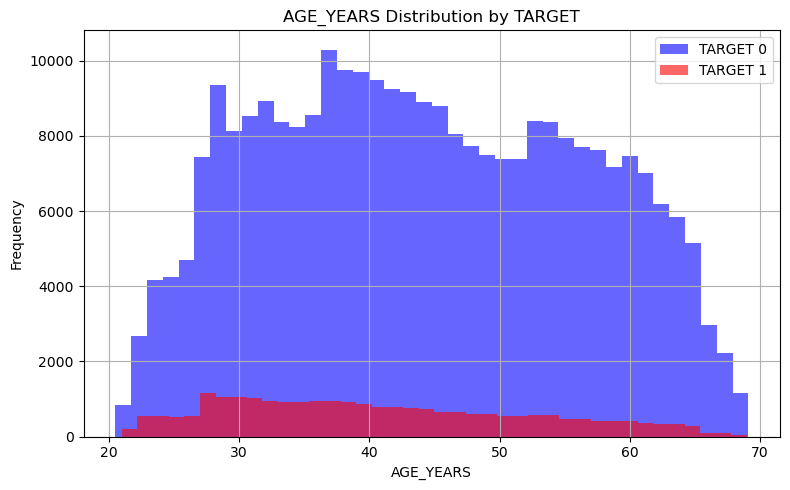

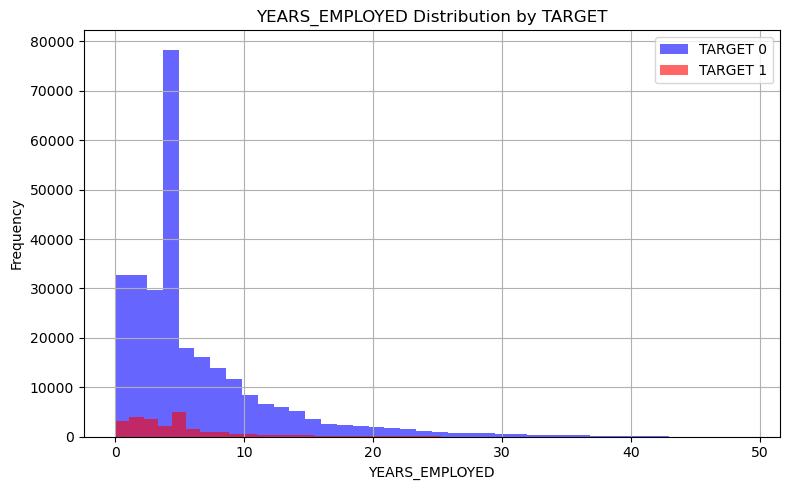

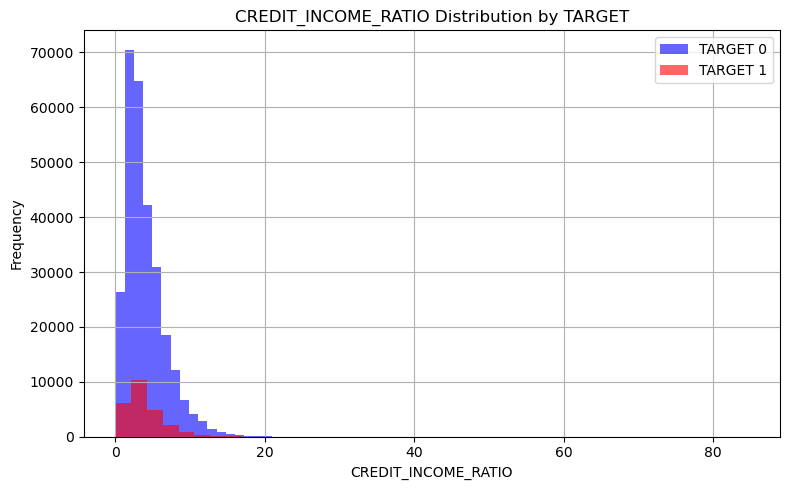

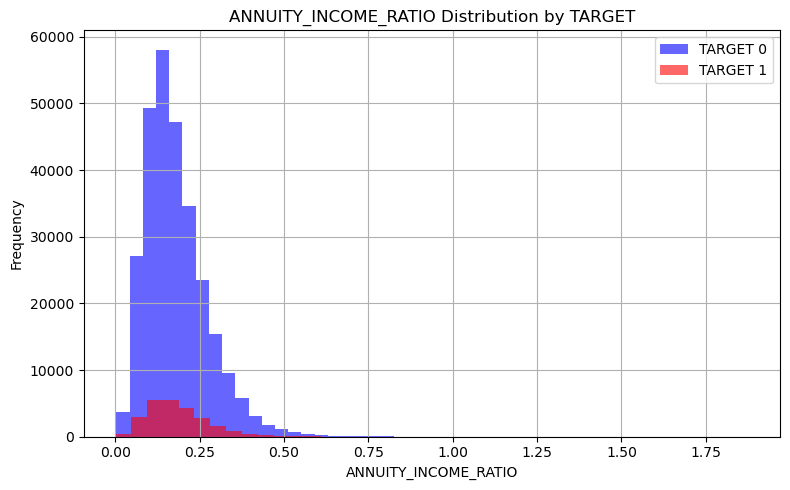

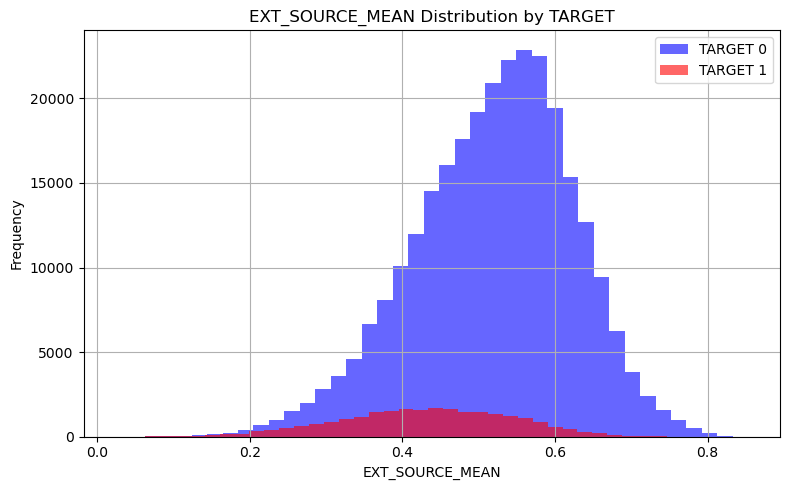

In [29]:
# STEP 8.1 (apply): compare key engineered features

cols_to_compare = [
    "AGE_YEARS",
    "YEARS_EMPLOYED",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "EXT_SOURCE_MEAN"
]

for col in cols_to_compare:
    if col in df_fe.columns:
        plot_target_compare(df_fe, col)


In [30]:
# STEP 8.2: BOX PLOTS FOR TARGET COMPARISON

import seaborn as sns
import matplotlib.pyplot as plt

def plot_box(df, col):
    plt.figure(figsize=(7,5))
    sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])
    plt.title(f"{col} vs TARGET")
    plt.tight_layout()
    plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_26960\2000926540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])


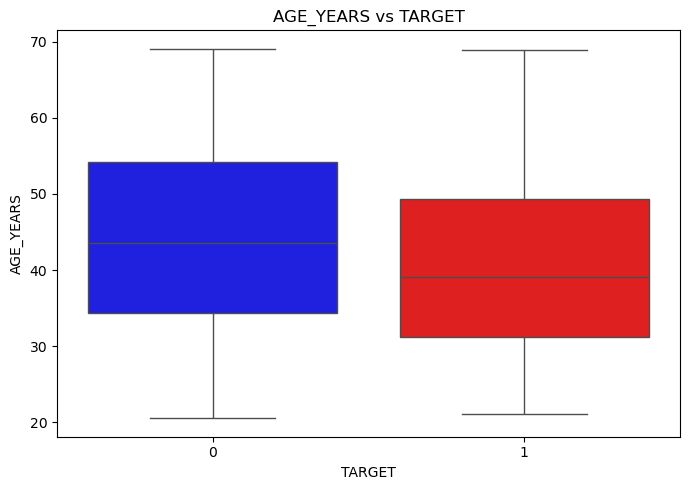

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\2000926540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])


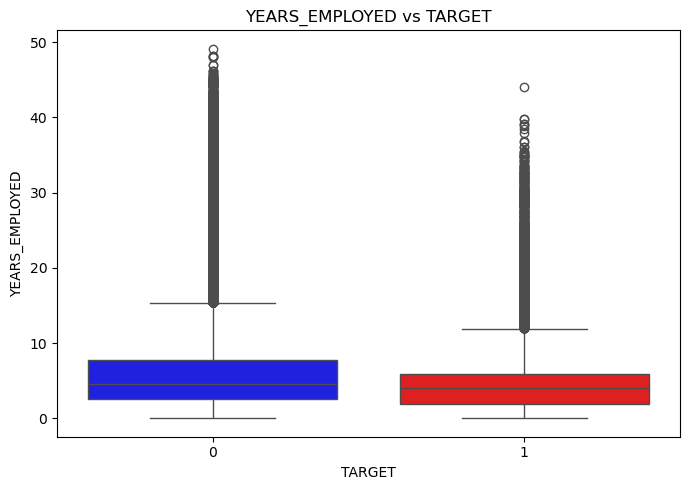

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\2000926540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])


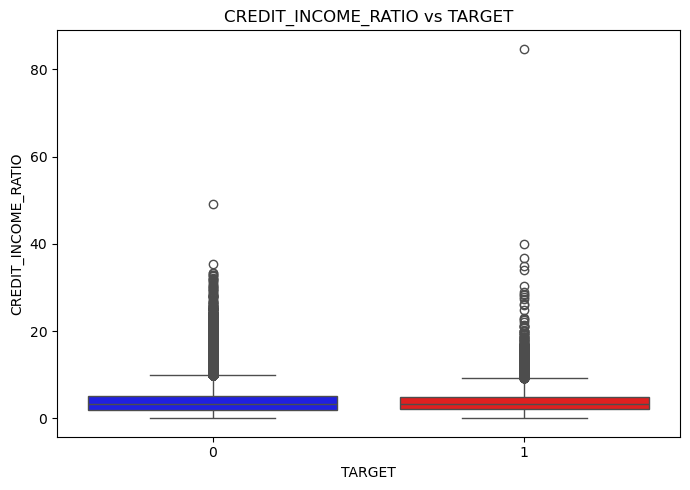

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\2000926540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])


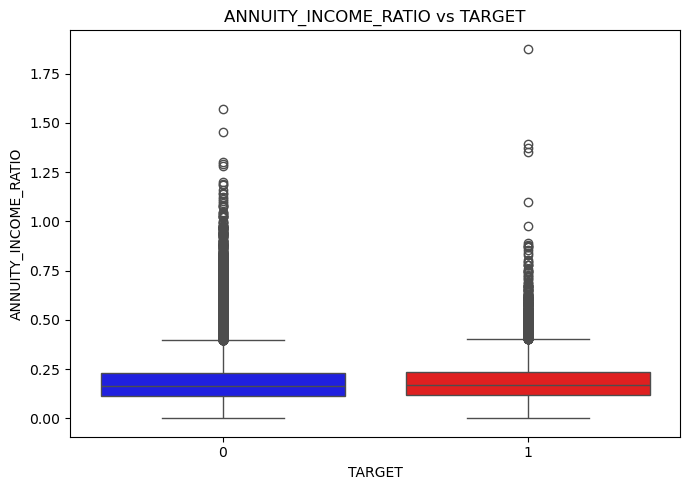

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\2000926540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y=col, data=df, palette=["blue","red"])


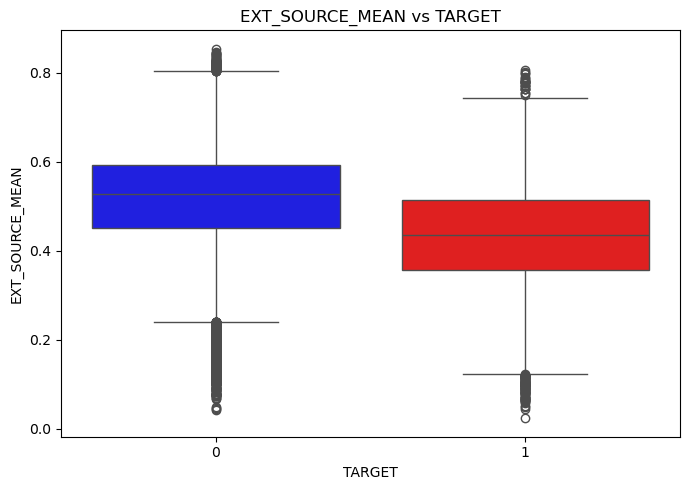

In [31]:
boxplot_cols = [
    "AGE_YEARS",
    "YEARS_EMPLOYED",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "EXT_SOURCE_MEAN"
]

for col in boxplot_cols:
    if col in df_fe.columns:
        plot_box(df_fe, col)


In [32]:
# STEP 8.3: VIOLIN PLOTS FOR TARGET COMPARISON

def plot_violin(df, col):
    plt.figure(figsize=(7,5))
    sns.violinplot(x="TARGET", y=col, data=df, palette=["blue","red"], cut=0)
    plt.title(f"{col} vs TARGET (Violin Plot)")
    plt.tight_layout()
    plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1616687726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="TARGET", y=col, data=df, palette=["blue","red"], cut=0)


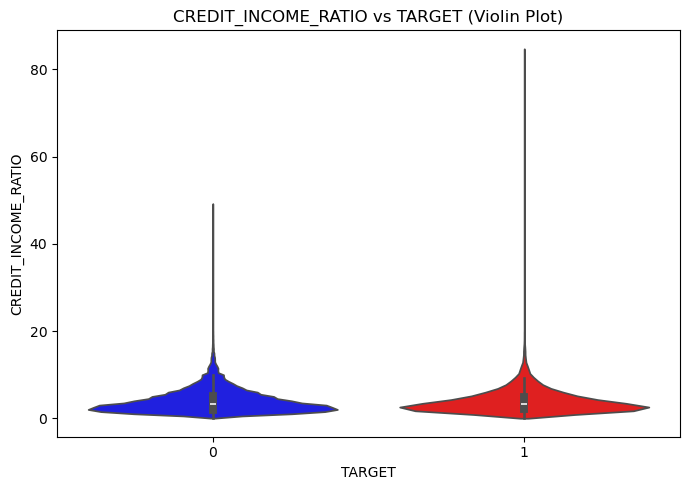

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1616687726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="TARGET", y=col, data=df, palette=["blue","red"], cut=0)


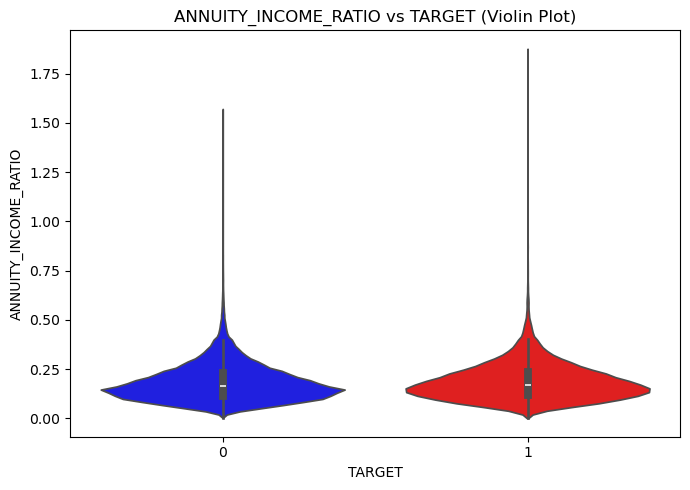

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1616687726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="TARGET", y=col, data=df, palette=["blue","red"], cut=0)


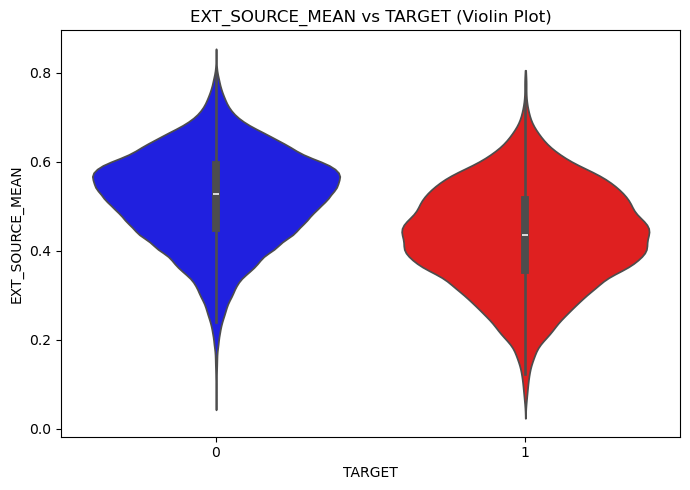

In [33]:
violin_cols = [
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "EXT_SOURCE_MEAN"
]

for col in violin_cols:
    if col in df_fe.columns:
        plot_violin(df_fe, col)


In [35]:
# STEP 8.4: CATEGORICAL TARGET PLOTS

def plot_categorical(df, col, top_n=10):
    plt.figure(figsize=(10,5))
    data = df.groupby(col)["TARGET"].mean().sort_values(ascending=False).head(top_n)
    sns.barplot(x=data.index, y=data.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate (TARGET mean)")
    plt.tight_layout()
    plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


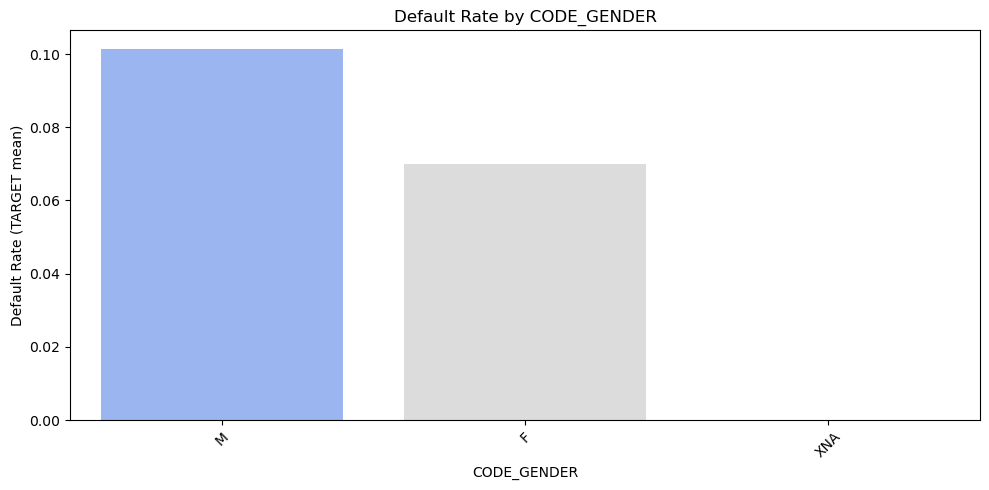

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


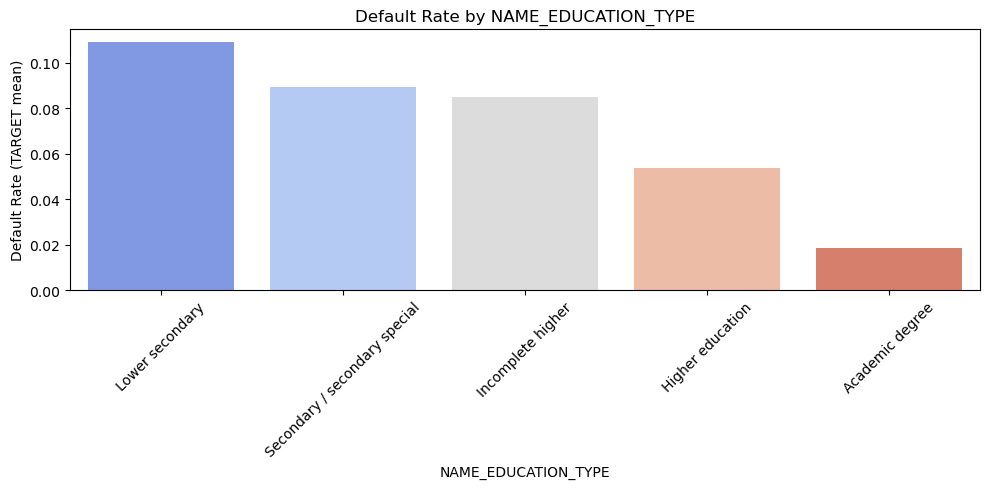

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


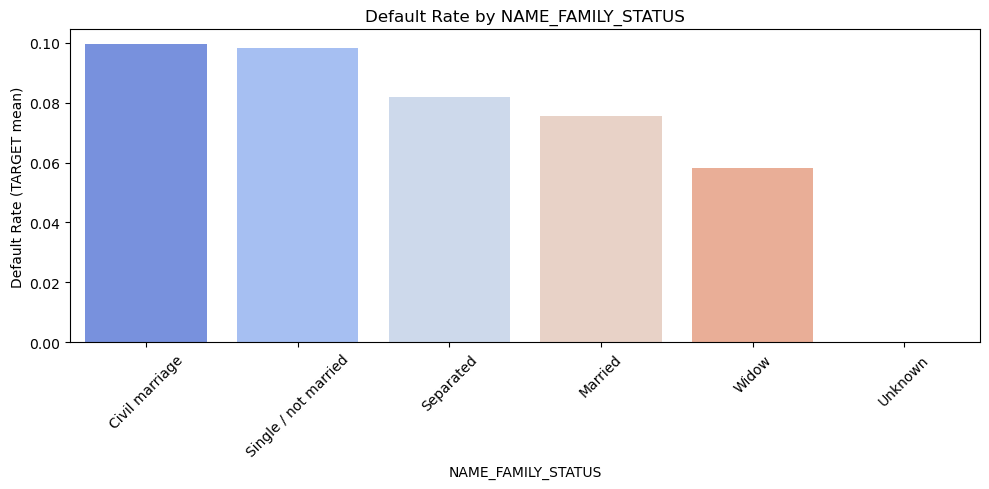

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


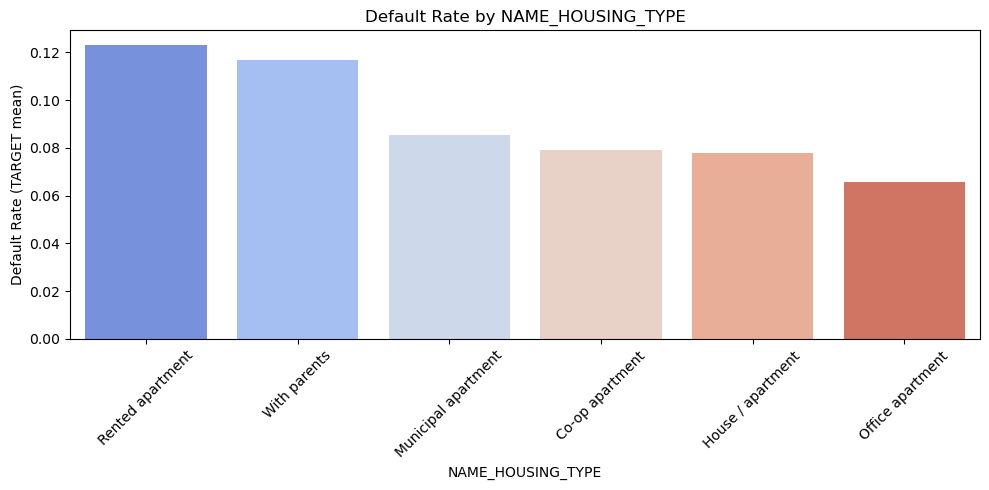

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


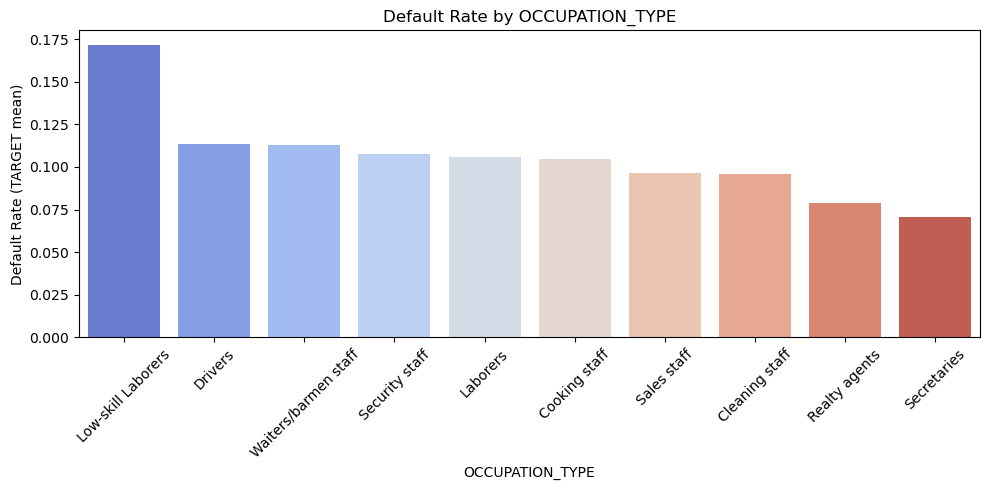

C:\Users\samir\AppData\Local\Temp\ipykernel_26960\1980710726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="coolwarm")


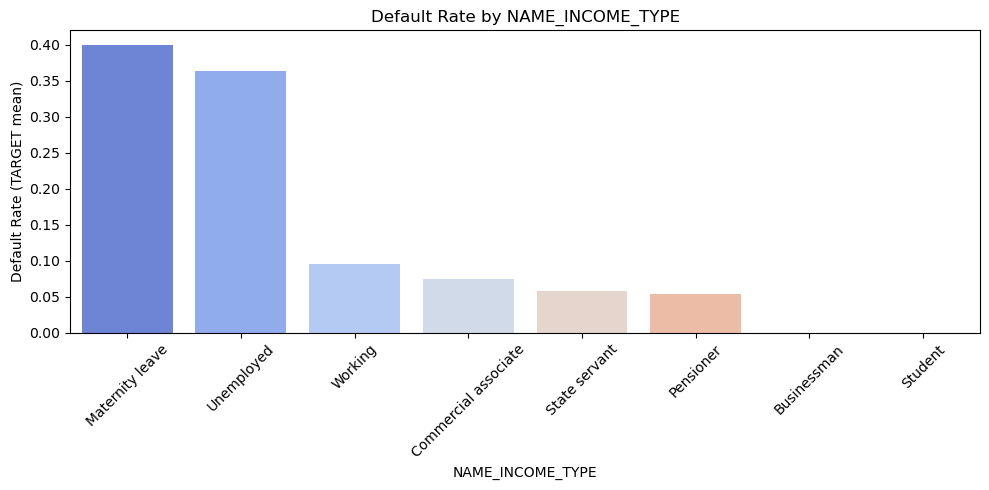

In [36]:
categorical_cols = [
    "CODE_GENDER",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "NAME_INCOME_TYPE"
]

for col in categorical_cols:
    plot_categorical(df_fe, col)


In [39]:
# STEP 9.1: SELECT ENGINEERED FEATURES FOR CORRELATION

fe_cols = [
    "AGE_YEARS",
    "YEARS_EMPLOYED",
    "YEARS_REG",
    "YEARS_ID_CHANGE",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "ANNUITY_CREDIT_RATIO",
    "GOODS_CREDIT_RATIO",
    "FAMILY_SIZE",
    "CHILDREN_RATIO",
    "HAS_CHILDREN",
    "EXT_SOURCE_MEAN",
    "EXT_SOURCE_MIN",
    "EXT_SOURCE_MAX",
    "RECENT_PHONE_CHANGE",
    "SHORT_EMPLOYMENT",
    "LOG_AMT_INCOME_TOTAL",
    "LOG_AMT_CREDIT",
    "LOG_AMT_ANNUITY",
    "LOG_AMT_GOODS_PRICE",
    "TARGET"
]

fe_cols = [c for c in fe_cols if c in df_fe.columns]
df_corr = df_fe[fe_cols]
df_corr.head()


,AGE_YEARS,YEARS_EMPLOYED,YEARS_REG,YEARS_ID_CHANGE,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,ANNUITY_CREDIT_RATIO,GOODS_CREDIT_RATIO,FAMILY_SIZE,CHILDREN_RATIO,HAS_CHILDREN,EXT_SOURCE_MEAN,EXT_SOURCE_MIN,EXT_SOURCE_MAX,RECENT_PHONE_CHANGE,SHORT_EMPLOYMENT,LOG_AMT_INCOME_TOTAL,LOG_AMT_CREDIT,LOG_AMT_ANNUITY,LOG_AMT_GOODS_PRICE,TARGET
0,25.900,1.700,10.000,5.800,2.008,0.122,0.061,0.863,1.000,0.000,0,0.162,0.083,0.263,0,0,12.219,12.916,10.115,12.769,1
1,45.900,3.300,3.200,0.800,4.791,0.132,0.028,0.873,2.000,0.000,0,0.490,0.311,0.622,0,0,12.506,14.073,10.483,13.937,0
2,52.200,0.600,11.700,6.900,2.000,0.100,0.050,1.000,1.000,0.000,0,0.597,0.506,0.730,0,1,11.120,11.813,8.817,11.813,0
3,52.100,8.300,26.900,6.700,2.316,0.220,0.095,0.950,2.000,0.000,0,0.564,0.506,0.650,0,0,11.813,12.653,10.298,12.601,0
4,54.600,8.300,11.800,9.500,4.222,0.180,0.043,1.000,1.000,0.000,0,0.455,0.323,0.535,0,0,11.708,13.148,9.993,13.148,0


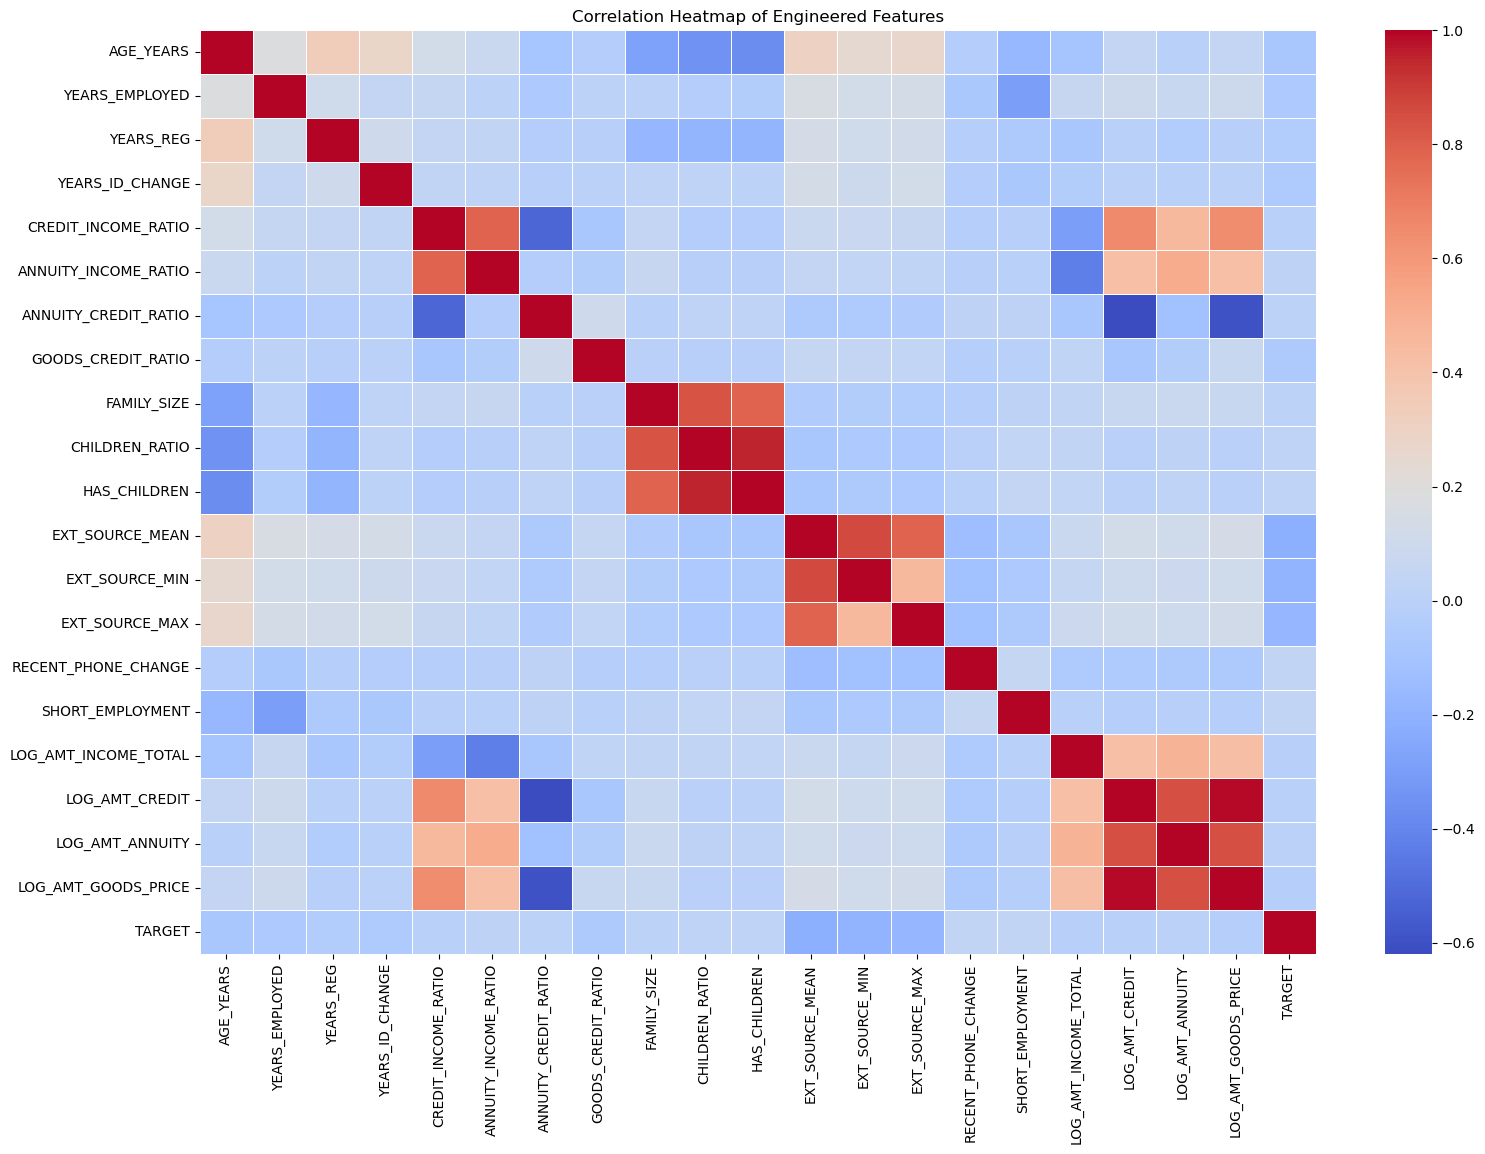

In [40]:
# STEP 9.2: CORRELATION HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
corr = df_corr.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features")
plt.show()


In [41]:
# STEP 10: BUSINESS INSIGHTS SUMMARY

print("=== BUSINESS INSIGHTS FROM EDA ===\n")

# 1. TARGET distribution
default_rate = df_fe["TARGET"].mean()
print(f"- Overall default rate: {default_rate:.2%}\n")

# 2. Age insight
avg_age_default = df_fe[df_fe["TARGET"]==1]["AGE_YEARS"].mean()
avg_age_non = df_fe[df_fe["TARGET"]==0]["AGE_YEARS"].mean()
print(f"- Younger applicants are more risky:")
print(f"  * Avg age (default): {avg_age_default:.1f}")
print(f"  * Avg age (non-default): {avg_age_non:.1f}\n")

# 3. Credit-Income Ratio
mean_ratio_default = df_fe[df_fe["TARGET"]==1]["CREDIT_INCOME_RATIO"].mean()
mean_ratio_non = df_fe[df_fe["TARGET"]==0]["CREDIT_INCOME_RATIO"].mean()
print(f"- High credit/income ratio increases risk:")
print(f"  * Default: {mean_ratio_default:.3f}")
print(f"  * Non-default: {mean_ratio_non:.3f}\n")

# 4. Employment
short_emp_default = df_fe[df_fe["TARGET"]==1]["SHORT_EMPLOYMENT"].mean()
short_emp_non = df_fe[df_fe["TARGET"]==0]["SHORT_EMPLOYMENT"].mean()
print(f"- Short employment (<1 year) is a strong risk factor:")
print(f"  * Default: {short_emp_default:.2%}")
print(f"  * Non-default: {short_emp_non:.2%}\n")

# 5. EXT SOURCE
ext_default = df_fe[df_fe["TARGET"]==1]["EXT_SOURCE_MEAN"].mean()
ext_non = df_fe[df_fe["TARGET"]==0]["EXT_SOURCE_MEAN"].mean()
print(f"- External risk scores are the STRONGEST predictor:")
print(f"  * EXT score (default): {ext_default:.3f}")
print(f"  * EXT score (non-default): {ext_non:.3f}\n")

# 6. Children
child_default = df_fe[df_fe["TARGET"]==1]["HAS_CHILDREN"].mean()
child_non = df_fe[df_fe["TARGET"]==0]["HAS_CHILDREN"].mean()
print(f"- Applicants with children show higher risk:")
print(f"  * Default: {child_default:.2%}")
print(f"  * Non-default: {child_non:.2%}\n")

print("\n=== END OF INSIGHTS ===")


=== BUSINESS INSIGHTS FROM EDA ===

- Overall default rate: 8.07%

- Younger applicants are more risky:
  * Avg age (default): 40.8
  * Avg age (non-default): 44.2

- High credit/income ratio increases risk:
  * Default: 3.887
  * Non-default: 3.964

- Short employment (<1 year) is a strong risk factor:
  * Default: 11.76%
  * Non-default: 8.29%

- External risk scores are the STRONGEST predictor:
  * EXT score (default): 0.431
  * EXT score (non-default): 0.519

- Applicants with children show higher risk:
  * Default: 33.10%
  * Non-default: 29.69%


=== END OF INSIGHTS ===


In [42]:
!pip install streamlit plotly


In [43]:
%%writefile app.py
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px

# ==========================
# CONFIG
# ==========================

st.set_page_config(
    page_title="Credit Risk Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.markdown(
    "<h1 style='color:white;'>📊 Credit Risk Dashboard</h1>",
    unsafe_allow_html=True
)
st.markdown("<hr>", unsafe_allow_html=True)

# ==========================
# LOAD DATA
# ==========================

@st.cache_data
def load_data():
    df = pd.read_csv(r"C:\projects\app project\application_data.csv")

    # Fix anomalies
    df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = np.nan

    # Fill categorical
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].fillna("Unknown")

    # Fill numeric
    for col in df.select_dtypes(include=[np.number]).columns:
        if col not in ["SK_ID_CURR", "TARGET"]:
            df[col] = df[col].fillna(df[col].median())

    # Feature Engineering
    df["AGE_YEARS"] = (-df["DAYS_BIRTH"] / 365).round(1)
    df["YEARS_EMPLOYED"] = (-df["DAYS_EMPLOYED"] / 365).round(1)

    df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
    df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
    df["ANNUITY_CREDIT_RATIO"] = df["AMT_ANNUITY"] / df["AMT_CREDIT"]

    df["EXT_SOURCE_MEAN"] = df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].mean(axis=1)
    df["SHORT_EMPLOYMENT"] = (df["YEARS_EMPLOYED"] < 1).astype(int)

    return df

df = load_data()

# ==========================
# SIDEBAR FILTERS
# ==========================

st.sidebar.header("🔍 Filters")

target_choice = st.sidebar.selectbox(
    "Target Filter",
    ["All", "Default only (1)", "Non-default only (0)"]
)

gender = st.sidebar.selectbox("Gender:", ["All"] + sorted(df["CODE_GENDER"].unique()))
income_type = st.sidebar.selectbox("Income Type:", ["All"] + sorted(df["NAME_INCOME_TYPE"].unique()))

age_range = st.sidebar.slider(
    "Age Range",
    float(df["AGE_YEARS"].min()),
    float(df["AGE_YEARS"].max()),
    (float(df["AGE_YEARS"].min()), float(df["AGE_YEARS"].max()))
)

# ==========================
# APPLY FILTERS
# ==========================

df_filtered = df.copy()

if target_choice == "Default only (1)":
    df_filtered = df_filtered[df_filtered["TARGET"] == 1]
elif target_choice == "Non-default only (0)":
    df_filtered = df_filtered[df_filtered["TARGET"] == 0]

if gender != "All":
    df_filtered = df_filtered[df_filtered["CODE_GENDER"] == gender]

if income_type != "All":
    df_filtered = df_filtered[df_filtered["NAME_INCOME_TYPE"] == income_type]

df_filtered = df_filtered[
    (df_filtered["AGE_YEARS"] >= age_range[0]) &
    (df_filtered["AGE_YEARS"] <= age_range[1])
]

# ==========================
# KPI CARDS
# ==========================

st.subheader("📌 Key Metrics")

total = len(df_filtered)
default_rate = df_filtered["TARGET"].mean() * 100
avg_income = df_filtered["AMT_INCOME_TOTAL"].mean()
avg_credit = df_filtered["AMT_CREDIT"].mean()

col1, col2, col3, col4 = st.columns(4)
col1.metric("Total Clients", f"{total:,}")
col2.metric("Default Rate", f"{default_rate:.2f}%")
col3.metric("Average Income", f"{avg_income:,.0f}")
col4.metric("Average Credit", f"{avg_credit:,.0f}")

st.markdown("<hr>", unsafe_allow_html=True)

# ==========================
# CHART 1 — CATEGORY DEFAULT RATE
# ==========================

st.subheader("📉 Default Rate by Category")

cat_option = st.selectbox(
    "Choose Category:",
    ["CODE_GENDER", "NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", 
     "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
)

cat_df = df_filtered.groupby(cat_option)["TARGET"].mean().reset_index()
fig = px.bar(cat_df, x=cat_option, y="TARGET", title=f"Default Rate by {cat_option}", template="plotly_dark")
st.plotly_chart(fig, use_container_width=True)

# ==========================
# CHART 2 — NUMERIC HISTOGRAM
# ==========================

st.subheader("📈 Numeric Distribution by TARGET")

num_option = st.selectbox(
    "Choose Numeric Feature:",
    ["AGE_YEARS", "YEARS_EMPLOYED", "CREDIT_INCOME_RATIO", 
     "ANNUITY_INCOME_RATIO", "EXT_SOURCE_MEAN", "AMT_INCOME_TOTAL", "AMT_CREDIT"]
)

fig2 = px.histogram(
    df_filtered,
    x=num_option,
    color="TARGET",
    nbins=40,
    marginal="box",
    template="plotly_dark",
    opacity=0.6,
    title=f"{num_option} Distribution by TARGET"
)
st.plotly_chart(fig2, use_container_width=True)

# ==========================
# RAW DATA TOGGLE
# ==========================

with st.expander("🗂 Show Raw Data"):
    st.dataframe(df_filtered)


Writing app.py


In [ ]:
!streamlit run app.py --server.port 9992
